In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from src.assignment1.cont import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

sns.set_theme(style='darkgrid')

## Task 7: Simulate population of 1000

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


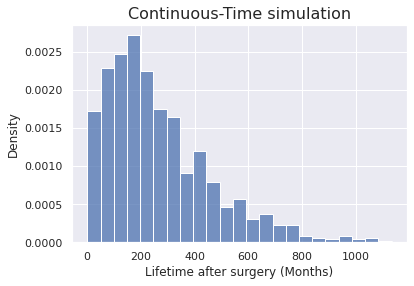

In [51]:
pop = sim_population(1000)
g = sns.histplot(pop.lifetimes, stat='density', )
g.set_title("Continuous-Time simulation", fontsize=16)
g.set_xlabel("Lifetime after surgery (Months)")
plt.savefig('Part7_hist.eps')

In [87]:
mean, (mean_lwr, mean_upr) = pop.mean_lifetime(.95)
sd, (sd_lwr, sd_upr) = pop.sd_lifetime(.95)
mean_sd_df = pd.DataFrame({
    'Estimate': [mean, sd],
    'Lower Bound': [mean_lwr, sd_lwr],
    'Upper Bound': [mean_upr, sd_upr]
}, index = ['Mean', 'Std. Deviation'])

mean_sd_df.to_latex('mean_sd_table.txt')

/tmp/ipykernel_61580/2504723865.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  mean_sd_df.to_latex('mean_sd_table.txt')


In [86]:
mean_sd_df

,Estimate,Lower Bound,Upper Bound
Mean,264.861213,252.594764,277.127661
Std. Deviation,197.671589,189.371823,206.737867


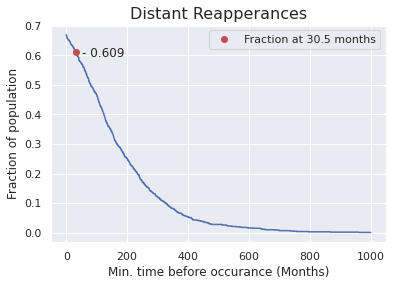

In [49]:
y = pop.distant_reappearance_proportion_after_time(30.5)
x = np.linspace(0,1000, 2000)
g = sns.lineplot(x=x, y=[pop.distant_reappearance_proportion_after_time(i) for i in x], label='_nolegend_')
plt.plot(30.5, y, 'or')
plt.text(30.5 + 20.2, y-0.015, f'- {y}')
g.set_title('Distant Reapperances', fontsize=16)
g.set_xlabel('Min. time before occurance (Months)')
g.set_ylabel('Fraction of population')
plt.legend(labels=['Fraction at 30.5 months'])

## Task 8: Compare Lifetime distribution

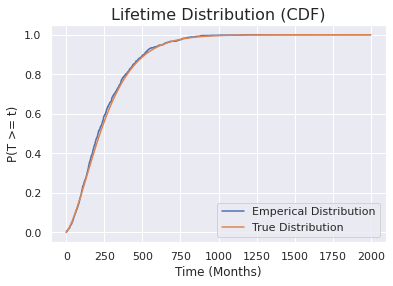

In [6]:
x = np.arange(0,2000)
g = sns.lineplot(x=x, y=pop.emperical_lifetime_distribution((0, 2000)))
sns.lineplot(x=x, y=true_lifetime_distribution(x))
g.set_xlabel('Time (Months)')
g.set_ylabel('P(T >= t)')
g.set_title('Lifetime Distribution (CDF)', fontsize=16)
plt.legend(['Emperical Distribution', 'True Distribution'])

In [7]:
stats.kstest(pop.lifetimes, true_lifetime_distribution)

KstestResult(statistic=0.033749205153561945, pvalue=0.20019846743194958)

## Task 9: Preventitive Treatment

In [4]:
Q9 = np.zeros((5,5))
Q9[0, 1:] = [0.0025, 0.00125, 0, 0.001]
Q9[1, 2:] = [0, 0.002, 0.005]
Q9[2, 3:] = [0.003, 0.005]
Q9[3, 4:] = [0.009]
np.fill_diagonal(Q9, -np.sum(Q9, axis=1))
Q9

array([[-0.00475,  0.0025 ,  0.00125,  0.     ,  0.001  ],
       [ 0.     , -0.007  ,  0.     ,  0.002  ,  0.005  ],
       [ 0.     ,  0.     , -0.008  ,  0.003  ,  0.005  ],
       [ 0.     ,  0.     ,  0.     , -0.009  ,  0.009  ],
       [ 0.     ,  0.     ,  0.     ,  0.     , -0.     ]])

Text(0.5, 1.0, 'Lifetimes of women w/ preventitive treatment')

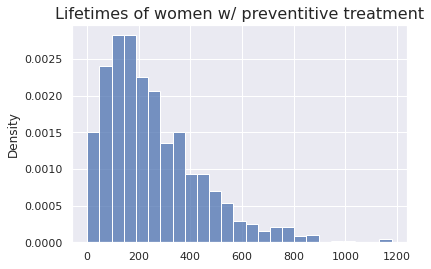

In [9]:
pop9 = sim_population(1000, Q=Q9)
g = sns.histplot(pop.lifetimes, stat='density')
g.set_title('Lifetimes of women w/ preventitive treatment', fontsize=16)

Text(0.5, 1.0, 'Survival Function (Kaplan-Meier estimator)')

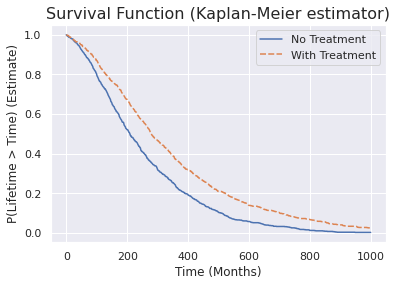

In [10]:
x = np.arange(0,1000)

df = pd.DataFrame({
    'Time': x,
    'No Treatment': pop.survival_function(x),
    'With Treatment': pop9.survival_function(x)
    })

df = df.set_index('Time')
sns.lineplot(data=df)
gca = plt.gca()
gca.set_xlabel("Time (Months)")
gca.set_ylabel("P(Lifetime > Time) (Estimate)")
gca.set_title("Survival Function (Kaplan-Meier estimator)", fontsize=16)

# Part 3

## Task 12

<AxesSubplot:ylabel='Count'>

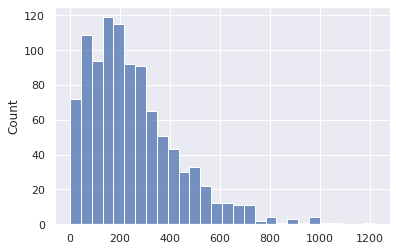

In [8]:
pop = sim_population(1000)
sns.histplot(pop.lifetimes)

In [9]:
Q = np.zeros([5,5])
Q[0,:] =    [-0.0085, 0.005, 0.0025, 0, 0.001]
Q[1, 1:] =  [-0.014, 0.005, 0.004, 0.005]
Q[2, 2:] =  [-0.008, 0.003, 0.005]
Q[3, 3:] =  [-0.009, 0.009]

obs = pop.observed_population()

In [10]:
new_Q = infer_Q_from_observations(obs, Q)

In [11]:
np.max(np.abs(Q - new_Q))

0.00804486245776793

In [12]:
Q_guess = np.zeros([5,5])
Q_guess[0,1:] = np.ones(4)*1e-2
# Q_guess[0,3] = 0
Q_guess[1, 2:] = np.ones(3)*1e-2
Q_guess[2, 3:] = np.ones(2)*1e-2
Q_guess[3, 4:] = 1e-2
np.fill_diagonal(Q_guess, -np.sum(Q_guess, axis=1))

np.max(np.abs(Q_guess - Q))

0.0315

In [13]:

new_Q_from_guess = infer_Q_from_observations(obs, Q_guess, tol=1e-3)

In [14]:
np.max(np.abs(new_Q_from_guess - Q))

0.008135984228121156

In [15]:
new_Q

array([[-0.01195137,  0.00646569,  0.00350175,  0.        ,  0.00198393],
       [ 0.        , -0.00595514,  0.00182727,  0.0018713 ,  0.00225657],
       [ 0.        ,  0.        , -0.00572655,  0.00164685,  0.0040797 ],
       [ 0.        ,  0.        ,  0.        , -0.000999  ,  0.000999  ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.        ]])

In [16]:
new_Q_from_guess

array([[-0.01240935,  0.00631636,  0.00336294,  0.00044674,  0.00228332],
       [ 0.        , -0.00586402,  0.00200459,  0.00149769,  0.00236174],
       [ 0.        ,  0.        , -0.00570106,  0.00167829,  0.00402277],
       [ 0.        ,  0.        ,  0.        , -0.00098604,  0.00098604],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.        ]])